## Energy data transformation

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from matplotlib import pyplot as plt

**0. Load prerequisites**

In [2]:
datasets = !ls datasets
years = list(range(2000,2018))
countries = list(pd.read_csv('datasets/'+str(datasets[0])).Country)
print(*datasets, sep="\n")

(0)countries.csv
1971-2014Electric power consumption (kWh per capita).xls
(1990-2015)Consumption_GDP ratio.csv
1990-2015GDP per capita (current US$).xls
1990-2015Renewable electricity output (_ of total electricity output).xls
countrydatasheets_august2018 (1).xlsx
expenditures on R_D in percentage of GDP.xls
Global Climate Legislation Database.csv
household_EU_2009-2017_ilc_di04_1_Data.csv
(Not complete) R_D Total Support in Million Euros.xlsx


** 1. Percentage of the Total of Renewable energy consumption **

In [3]:
renewable_energy = pd.read_csv('datasets/'+str(datasets[2]))

In [4]:
renewable_energy.head()

,Entity,Code,Year,Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption),"GDP per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [5]:
renewable_energy = renewable_energy[['Entity','Year',
                                     'Renewable energy consumption (% of total final energy consumption) (% of total final energy consumption)']]
renewable_energy.columns = ['country','year','percentage_renewable_energy']
renewable_energy = renewable_energy[(renewable_energy.year.isin(years)) & 
                                    (renewable_energy.country.isin(countries))]

In [6]:
renewable_energy.head(3)

,country,year,percentage_renewable_energy
161,Albania,2000,41.445416
162,Albania,2001,39.125664
163,Albania,2002,35.896294


** 2. Total RD&D in Million Euro **

In [7]:
research_energy = pd.read_excel('datasets/'+str(datasets[-1]), header=4 ,sheet_name='OECD.Stat export')

In [8]:
research_energy.head(3)

,Time,Unnamed: 1,1974,1975,1976,1977,1978,1979,1980,1981,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,NaN,..,..,..,..,..,0,14.431,16.799,...,35.027,31.066,97.929,72.585,52.407,51.642,21.583,21.449,15.088,21.936
2,Austria,NaN,..,..,..,14.891,16.478,15.204,19.663,16.422,...,27.352,42.722,62.972,70.77,60.305,59.508,64.833,58.456,67.333,65.747


In [9]:
research_energy = pd.melt(research_energy, id_vars=research_energy.columns[0], 
            value_vars=list(research_energy.columns[1:]), var_name='Year', value_name='rrd_million_euro')
research_energy.columns = ['country','year','rrd_million_euro']
research_energy = research_energy[(research_energy.year.isin(list(map(str,years))))&
                                 (research_energy.country.isin(countries))]
research_energy.year = list(map(int, research_energy.year))
research_energy.rrd_million_euro = [0 if type(i) == str else i for i in research_energy.rrd_million_euro]

In [10]:
research_energy.head(3)

,country,year,rrd_million_euro
893,Austria,2000,9.62
894,Belgium,2000,0.00
896,Czech Republic,2000,0.00


** 3. Electric power consumption (kWh per capita) **

In [11]:
electric_consumption = pd.read_excel('datasets/'+str(datasets[1]), header=3 ,sheet_name='Data')

In [12]:
electric_consumption.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,188.961667,206.340578,207.031259,219.356355,280.402518,312.476017,NaN,NaN,NaN,NaN


In [13]:
electric_consumption = pd.melt(electric_consumption, id_vars=electric_consumption.columns[0], 
            value_vars=list(electric_consumption.columns[1:]), var_name='Year',
            value_name='kwh_per_capita_consumption')
electric_consumption.columns = ['country','year','kwh_per_capita_consumption']
electric_consumption = electric_consumption[(electric_consumption.year.isin(list(map(str,years)))) &
                                           (electric_consumption.country.isin(countries))]
electric_consumption.year = list(map(int, electric_consumption.year))

In [14]:
electric_consumption.head(3)

,country,year,kwh_per_capita_consumption
11355,Albania,2000,1449.65
11356,Andorra,2000,NaN
11364,Austria,2000,7076.27


** 4. GDP per capita (current US$) **

In [15]:
gdp_per_capita = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [16]:
gdp_per_capita #TODO fix

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN
3,Albania,ALB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.980777,99.986786,98.592221,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN
4,Andorra,AND,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.543210,88.731145,86.513158,86.689420,88.753269,89.432177,86.116700,NaN,NaN,NaN
5,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.328486,3.854010,3.549766,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN
6,United Arab Emirates,ARE,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.094142,0.258307,0.232401,NaN,NaN,NaN
7,Argentina,ARG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.927403,28.585456,32.305970,29.261135,31.484491,31.576204,28.140069,NaN,NaN,NaN
8,Armenia,ARM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.672721,39.485441,33.539704,28.944749,28.236057,25.754839,28.336966,NaN,NaN,NaN
9,American Samoa,ASM,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.702427,0.703140,0.700882,0.885478,NaN,NaN,NaN


In [17]:
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=gdp_per_capita.columns[0], 
            value_vars=list(gdp_per_capita.columns[1:]), var_name='Year', 
            value_name='gdp_per_capita')
gdp_per_capita.columns = ['country','year','gdp_per_capita']
gdp_per_capita = gdp_per_capita[(gdp_per_capita.year.isin(list(map(str,years)))) &
                               (gdp_per_capita.country.isin(countries))]
gdp_per_capita.year = list(map(int, gdp_per_capita.year))

In [18]:
gdp_per_capita

,country,year,gdp_per_capita
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544
11365,Azerbaijan,2000,8.20365
11367,Belgium,2000,1.26128
11371,Bulgaria,2000,6.57629
11374,Bosnia and Herzegovina,2000,48.8446
11375,Belarus,2000,0.103444
11387,Switzerland,2000,57.0005
11404,Czech Republic,2000,3.13259


** 5. Renewable electricity output (% of total electricity output)**

In [19]:
renewable_electricity = pd.read_excel('datasets/'+str(datasets[4]), header=3 ,sheet_name='Data')

In [20]:
renewable_electricity.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,11.327377,12.101021,14.915254,14.912186,15.099280,14.856161,NaN,NaN,NaN
1,Afghanistan,AFG,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.176603,85.986547,82.487562,85.909980,78.636408,85.323549,86.050111,NaN,NaN,NaN
2,Angola,AGO,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.343189,67.957423,70.907804,60.799484,58.020935,53.175105,53.174928,NaN,NaN,NaN


In [21]:
renewable_electricity = pd.melt(renewable_electricity, id_vars=renewable_electricity.columns[0], 
            value_vars=list(renewable_electricity.columns[1:]), 
            var_name='Year', 
            value_name='percentage_renewable_electricity')

renewable_electricity.columns = ['country','year','percentage_renewable_electricity']
renewable_electricity = renewable_electricity[(renewable_electricity.year.isin(list(map(str,years))))&
                                             (renewable_electricity.country.isin(countries))]
renewable_electricity.year = list(map(int, renewable_electricity.year))

In [22]:
renewable_electricity.head(3)

,country,year,percentage_renewable_electricity
11355,Albania,2000,96.149
11356,Andorra,2000,100
11364,Austria,2000,72.544


**6. Number of climate legislation acts**

In [23]:
legislation_acts =  pd.read_csv('datasets/'+str(datasets[-3]))

In [24]:
legislation_acts.head(3)

,Country,Name,Year Passed,Executive/Legislative,Framework,Categories,Document Type
0,Portugal,Decree-Law no. 4/2018 on incentives to electri...,2018,Executive,NaN,Energy Demand; Energy Supply; Transportation,Decree law
1,Macedonia (the former Yugoslav Republic of),Energy Law (compliant with the EU Third Energy...,2018,Legislative,NaN,Energy Supply,Law
2,France,Energy Renovation in Buildings Plan,2018,Executive,NaN,Energy Demand,Plan


In [25]:
legislation_acts = legislation_acts.groupby(['Country','Year Passed']).count()['Name'].reset_index()
legislation_acts.columns = ['country','year','number_of_legislation_acts']
legislation_acts = legislation_acts[(legislation_acts.year.isin(years)) &
                                   (legislation_acts.country.isin(countries))]

In [26]:
legislation_acts.head(3)

,country,year,number_of_legislation_acts
0,Albania,2003,1
1,Albania,2013,1
2,Albania,2017,1


** 7. CO2 emitions**

In [27]:
#pd.read_excel('datasets/'+str(datasets[7]), header=0 ,sheet='aggregator by year')


** 8. Gross domestic expenditure on R&D in % of GDP**

In [28]:
rd_expenditure = pd.read_excel('datasets/'+str(datasets[-4]), header=3 ,sheet_name='Sheet0')

In [29]:
rd_expenditure.head(3)

,geo\time,2000,Unnamed: 2,2001,Unnamed: 4,2002,Unnamed: 6,2003,Unnamed: 8,2004,...,2013,Unnamed: 28,2014,Unnamed: 30,2015,Unnamed: 32,2016,Unnamed: 34,2017,Unnamed: 36
0,EU28:EU (28 countries),0.24,(e),0.24,(e),0.23,(e),0.23,(e),0.23,...,0.25,NaN,0.24,NaN,0.24,NaN,0.23,NaN,0.23,(p)
1,EA19:Euro area (19 countries),0.26,(e),0.26,(e),0.26,(e),0.26,(e),0.26,...,0.28,NaN,0.28,NaN,0.28,NaN,0.27,NaN,0.28,(p)
2,BE:Belgium,0.12,NaN,0.12,NaN,0.14,NaN,0.13,NaN,0.14,...,0.2,NaN,0.21,NaN,0.23,NaN,0.23,(e),0.29,(p)


In [30]:
rd_expenditure = pd.melt(rd_expenditure, id_vars=rd_expenditure.columns[0], 
            value_vars=list(rd_expenditure.columns[1:]), var_name='Year', 
            value_name='rd_expenditure_on_share_gdp')
rd_expenditure.columns = ['country','year','rd_expenditure_on_share_gdp']
rd_expenditure.country = [i[3:] for i in rd_expenditure.country]
rd_expenditure = rd_expenditure[(rd_expenditure.year.isin(list(map(str,years)))) &
                               (rd_expenditure.country.isin(countries))]

rd_expenditure.year = list(map(int, rd_expenditure.year))
rd_expenditure.rd_expenditure_on_share_gdp = [
    0 if type(i) == str else i for i in rd_expenditure.rd_expenditure_on_share_gdp]

In [31]:
rd_expenditure.head(3)

,country,year,rd_expenditure_on_share_gdp
2,Belgium,2000,0.12
3,Bulgaria,2000,0.34
5,Denmark,2000,0.28


** 9. Median equivalised net income of EU Household**

In [32]:
household_income = pd.read_csv('datasets/'+str(datasets[-2]))

In [33]:
household_income.head(3)

,TIME,GEO,HHTYP,INDIC_IL,UNIT,Value,Flag and Footnotes
0,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Euro,"14,802",e
1,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,National currency,:,NaN
2,2009,"European Union (EU6-1958, EU9-1973, EU10-1981,...",Total,Median equivalised net income,Purchasing power standard (PPS),:,NaN


In [34]:
household_income = household_income[(household_income.HHTYP=='Total') &
                                    ((household_income.UNIT=='Euro'))][['GEO','TIME','Value']]
household_income.columns = ['country','year','median_household_income']
household_income.country = [i.replace(
    'Germany (until 1990 former territory of the FRG)','Germany') for i in household_income.country]
household_income = household_income[(household_income.year.isin(years))&
                                   (household_income.country.isin(countries))]
replacement = [i.replace(',','.') for i in household_income.median_household_income]
replacement = [j.replace(':','0') for j in replacement]
household_income.median_household_income = list(map(float, replacement))

In [35]:
household_income.head(3)

,country,year,median_household_income
105,Belgium,2009,19.309
120,Bulgaria,2009,2.828
150,Denmark,2009,25.027


** Create an spreadsheet**

In [36]:
countries_years = pd.DataFrame()
countries_years['country'] = sorted(countries)*len(years)
countries_years['year'] = [i for s in [[y]*len(countries) for y in years] for i in s]

In [37]:
#last entry has to be the dependent variable
tables = {#'Countries Years':countries_years,
          'Research Energy':research_energy,
          'Electric Consumption':electric_consumption,
          'Gdp per Capita':gdp_per_capita,
          'Renewable Electricity':renewable_electricity,
          #'Legislation Acts':legislation_acts,
         # 'RD Expenditure':rd_expenditure,
          'Household Income':household_income,
          'Renewable Energy':renewable_energy,
        }



In [38]:
excelbook = pd.ExcelWriter('energy_data.xlsx')
for name, table in tables.items():
    table.to_excel(excelbook, name, index=False)
excelbook.save()    

In [39]:
def make_time_series(tab):
    #sort data and add rate of change %

    for name,t in tab.items():
        t = t.sort_values(['country', 'year'])
        t['roc'] = t.iloc[:,-1].pct_change() #selects last column as target for % change
        tab[name]=t
        
    y = np.array([y for y in years] * len(eu_countries))
    c = np.ravel([[e for y in range(len(years))] for e in eu_countries])
    countries_years = pd.DataFrame(np.c_[c,y])


    time_series = countries_years.reset_index(drop = True)
    for name, t in tab.items():
        t = t.drop(t[~t['country'].isin(eu_countries)].index)
        t =  t.reset_index(drop=True)
        time_series[name] = t['roc']
    
    return time_series


In [40]:
def country_series(time_series,country = 'Austria'):
    cs = time_series.loc[time_series[0]==country]
    cs = cs.set_index(cs[1]) #in case year as timestep is useful
    cs = cs.drop(0,1)
    cs = cs.drop(1,1)
    return cs



In [41]:
#https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = len(data.columns)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(data.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #change infs and 0 to NaN values
    agg =  agg.replace([np.inf,0,-np.inf], np.nan)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#data = series_to_supervised(cs_austria, 1 , 1)
#drop columns we don't want to predict
#data.drop(data.columns[[7,8,9,10,11]], axis=1, inplace = True)
#data.head()

In [42]:
def series_to_input(time_series,n_features,n_lag=4):
    train_Xs = []
    train_ys = []
    test_Xs = []
    test_ys = []
    for country in eu_countries:
        sequence = series_to_supervised(country_series(time_series,country),n_lag,1,True)

        #drop the features we don't want to predict
        for n in range(n_features-1):
            sequence.drop(sequence.columns[len(sequence.columns)-2], axis=1, inplace = True)
        #turn rows to 0 with NaN values to mask them later
        sequence[pd.isnull(sequence).any(axis=1)] = 0
        #split into train and test set
        values = sequence.values
        n_train_years = 8
        train = values[:n_train_years, :]
        test = values[n_train_years:, :]    
        #split into input and outputs
        n_obs = n_lag * n_features
        train_X, train_y = train[:,:n_obs], train[:, -1]
        test_X, test_y = test[:, :n_obs], test[:, -1]
        #print(train_X.shape, len(train_X), train_y.shape)
        #reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], n_lag, n_features))
        test_X = test_X.reshape((test_X.shape[0], n_lag, n_features))
        #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

        train_Xs.append(train_X)
        train_ys.append(train_y)
        test_Xs.append(test_X)
        test_ys.append(test_y)
        #print("pair")
        #print(test_X)
        #print("y")
        #print(test_y)


    train_X = np.concatenate(train_Xs, axis = 0)
    train_y = np.concatenate(train_ys, axis = 0)
    test_X = np.concatenate(test_Xs, axis = 0)
    test_y = np.concatenate(test_ys, axis = 0)
    #print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
    
    return train_X, train_y, test_X, test_y


In [43]:

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Masking
from keras.losses import mean_absolute_error 
from keras import backend as K

#yhat = model.predict(test_X)

#print(np.mean(K.eval(mean_absolute_error(test_y,yhat))))


Using TensorFlow backend.


In [44]:
from itertools import chain
from itertools import combinations
#method to create a list of all possible combinations of factors
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))



In [45]:
#list of selected EU countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria','Croatia','Cyprus','Czech','Denmark','Estonia','Finland','France','Germany','Greece','Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']#...

#timeframe 
years = np.arange(2000,2018,1)

#powerset of factors to predict renewable energy
combinations_factors = list(powerset({i:tables[i] for i in tables if i!='Renewable Energy'}.items()))

dict_keys(['Renewable Energy'])


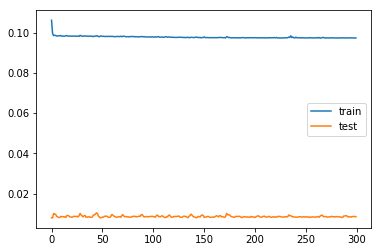

dict_keys(['Research Energy', 'Renewable Energy'])


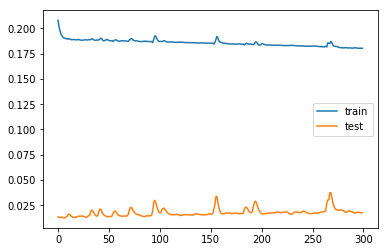

dict_keys(['Electric Consumption', 'Renewable Energy'])


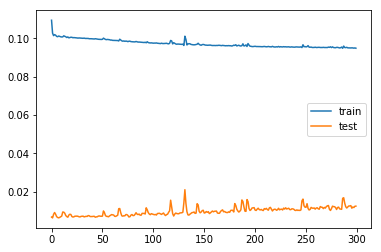

dict_keys(['Gdp per Capita', 'Renewable Energy'])


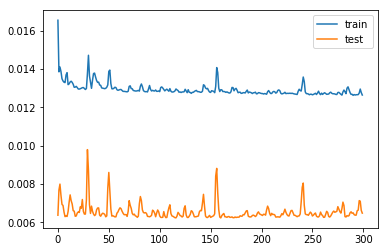

dict_keys(['Renewable Electricity', 'Renewable Energy'])


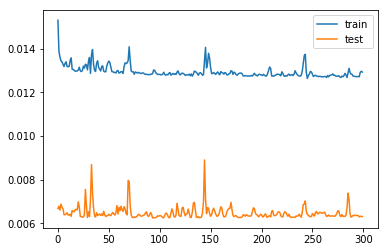

dict_keys(['Household Income', 'Renewable Energy'])


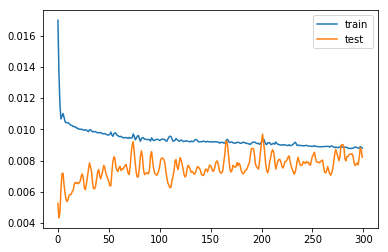

dict_keys(['Research Energy', 'Electric Consumption', 'Renewable Energy'])


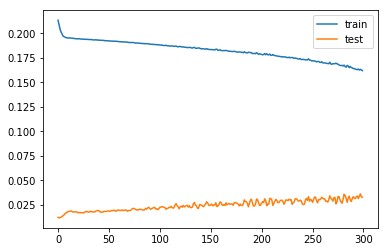

dict_keys(['Research Energy', 'Gdp per Capita', 'Renewable Energy'])


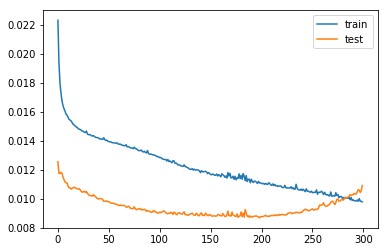

dict_keys(['Research Energy', 'Renewable Electricity', 'Renewable Energy'])


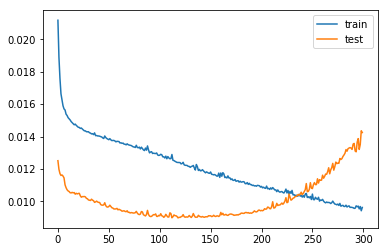

dict_keys(['Research Energy', 'Household Income', 'Renewable Energy'])


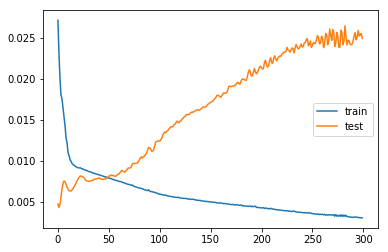

dict_keys(['Electric Consumption', 'Gdp per Capita', 'Renewable Energy'])


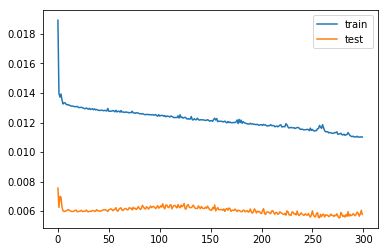

dict_keys(['Electric Consumption', 'Renewable Electricity', 'Renewable Energy'])


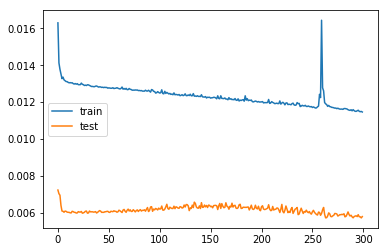

dict_keys(['Electric Consumption', 'Household Income', 'Renewable Energy'])


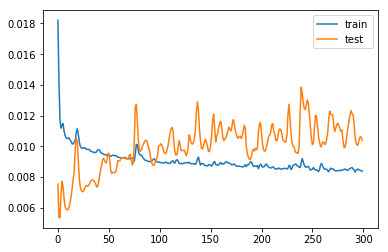

dict_keys(['Gdp per Capita', 'Renewable Electricity', 'Renewable Energy'])


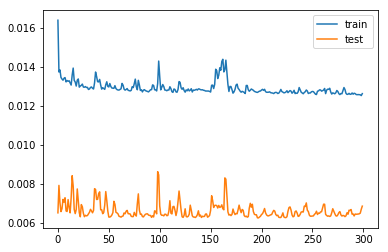

dict_keys(['Gdp per Capita', 'Household Income', 'Renewable Energy'])


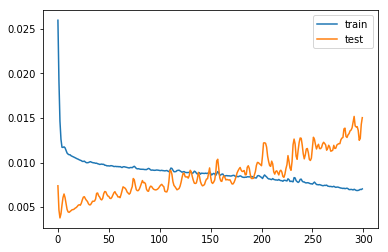

dict_keys(['Renewable Electricity', 'Household Income', 'Renewable Energy'])


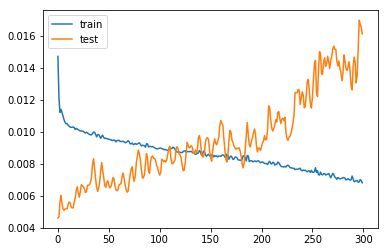

dict_keys(['Research Energy', 'Electric Consumption', 'Gdp per Capita', 'Renewable Energy'])


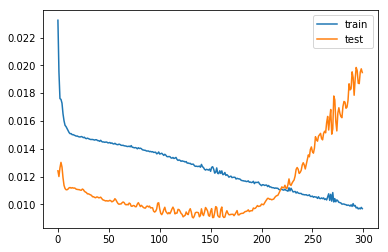

dict_keys(['Research Energy', 'Electric Consumption', 'Renewable Electricity', 'Renewable Energy'])


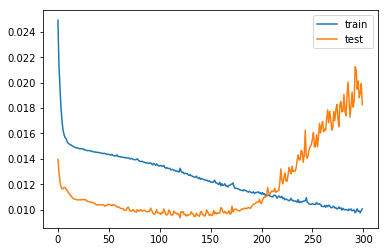

dict_keys(['Research Energy', 'Electric Consumption', 'Household Income', 'Renewable Energy'])


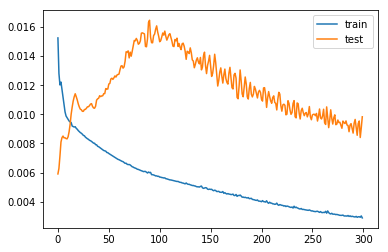

dict_keys(['Research Energy', 'Gdp per Capita', 'Renewable Electricity', 'Renewable Energy'])


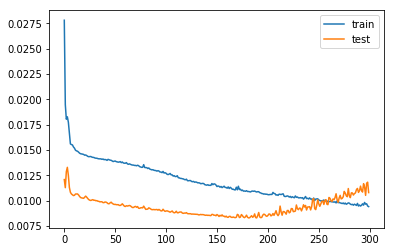

dict_keys(['Research Energy', 'Gdp per Capita', 'Household Income', 'Renewable Energy'])


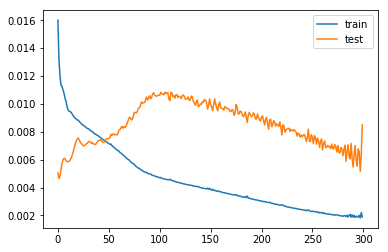

dict_keys(['Research Energy', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


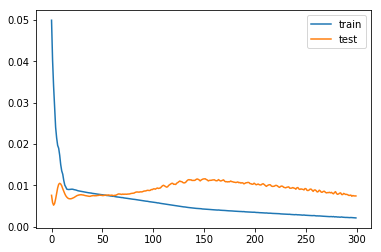

dict_keys(['Electric Consumption', 'Gdp per Capita', 'Renewable Electricity', 'Renewable Energy'])


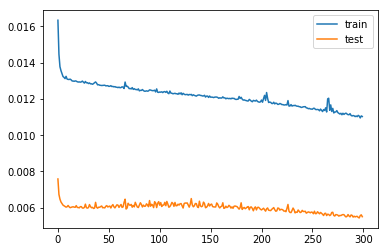

dict_keys(['Electric Consumption', 'Gdp per Capita', 'Household Income', 'Renewable Energy'])


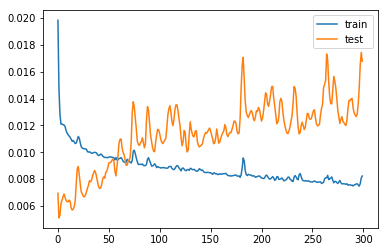

dict_keys(['Electric Consumption', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


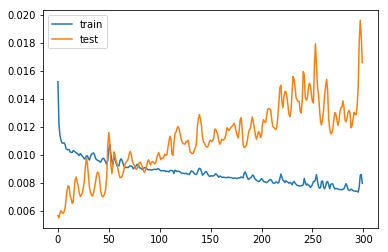

dict_keys(['Gdp per Capita', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


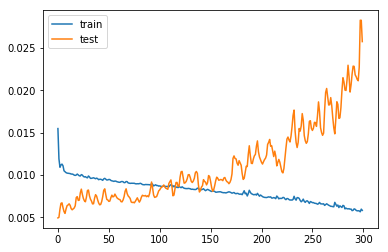

dict_keys(['Research Energy', 'Electric Consumption', 'Gdp per Capita', 'Renewable Electricity', 'Renewable Energy'])


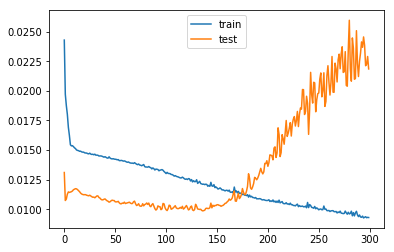

dict_keys(['Research Energy', 'Electric Consumption', 'Gdp per Capita', 'Household Income', 'Renewable Energy'])


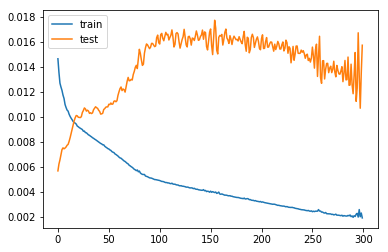

dict_keys(['Research Energy', 'Electric Consumption', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


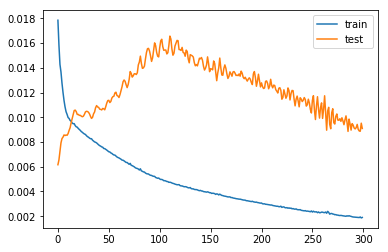

dict_keys(['Research Energy', 'Gdp per Capita', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


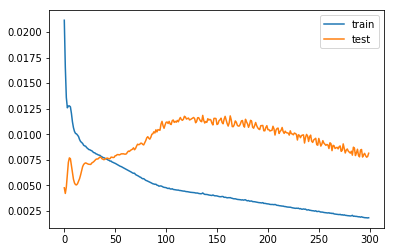

dict_keys(['Electric Consumption', 'Gdp per Capita', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


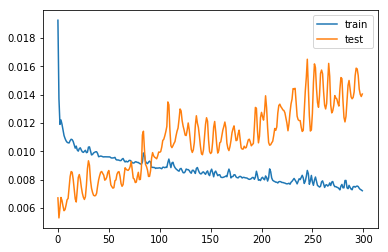

dict_keys(['Research Energy', 'Electric Consumption', 'Gdp per Capita', 'Renewable Electricity', 'Household Income', 'Renewable Energy'])


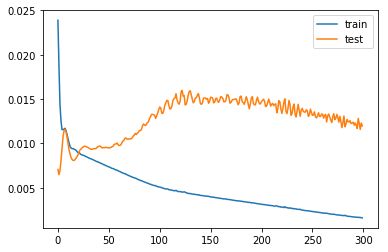

In [47]:
for combo in combinations_factors:    
    variables = {}
    for c in combo:
        variables[c[0]] = tables.get(c[0])
    variables['Renewable Energy'] = tables.get('Renewable Energy')
    n_features = len(variables)
    n_lag = 4
    time_series = make_time_series(variables)
    train_X, train_y, test_X, test_y = series_to_input(time_series, n_features, n_lag)
    
    #create network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1],
                                                   train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    #fit network
    #print("trainx:", train_X.shape)
    #print(train_X)
    #print("trainy:", train_y.shape)
    #print(train_y)
    print(variables.keys())
    history = model.fit(train_X, train_y, epochs=300, validation_data=(test_X, test_y), verbose = 0)
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    print(keras.)